# movies dataset

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

- **tag.csv** — tags applied to movies by users  
    - `userId`  
    - `movieId`  
    - `tag`  
    - `timestamp`  

- **rating.csv** — ratings of movies by users  
    - `userId`  
    - `movieId`  
    - `rating`  
    - `timestamp`  

- **movie.csv** — movie information  
    - `movieId`  
    - `title`  
    - `genres`  

- **link.csv** — identifiers to link to other sources  
    - `movieId`  
    - `imdbId`  
    - `tmbdId`  

- **genome_scores.csv** — movie–tag relevance data  
    - `movieId`  
    - `tagId`  
    - `relevance`  

- **genome_tags.csv** — tag descriptions  
    - `tagId`  
    - `tag`


In [16]:
# !curl -L -o movielens-20m-dataset.zip https://www.kaggle.com/api/v1/datasets/download/grouplens/movielens-20m-dataset

In [1]:
# carga de dataframes
import pandas as pd

PATH = 'movielens-20m-dataset/'
genome_scores = pd.read_csv(PATH + 'genome_scores.csv')
genome_tags = pd.read_csv(PATH + 'genome_tags.csv')
link = pd.read_csv(PATH + 'link.csv')
movie = pd.read_csv(PATH + 'movie.csv')
rating = pd.read_csv(PATH + 'rating.csv')
tag = pd.read_csv(PATH + 'tag.csv')

dataframes = {
    'genome_scores': genome_scores,
    'genome_tags': genome_tags,
    'link': link,
    'movie': movie,
    'rating': rating,
    'tag': tag
}

In [2]:
from ydata_profiling import ProfileReport
for df_name, df in dataframes.items():
    # profile = ProfileReport(df, title=df_name, explorative=True, progress_bar = False)
    # profile.to_file(f'reports/{df_name}.html')
    print(df_name,'\n')
    print(df.head(), '\n')
    print('cantidad de filas y columnas:', df.shape)
    print('-'*10)

genome_scores 

   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675 

cantidad de filas y columnas: (11709768, 3)
----------
genome_tags 

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s 

cantidad de filas y columnas: (1128, 2)
----------
link 

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 

cantidad de filas y columnas: (27278, 3)
----------
movie 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

          

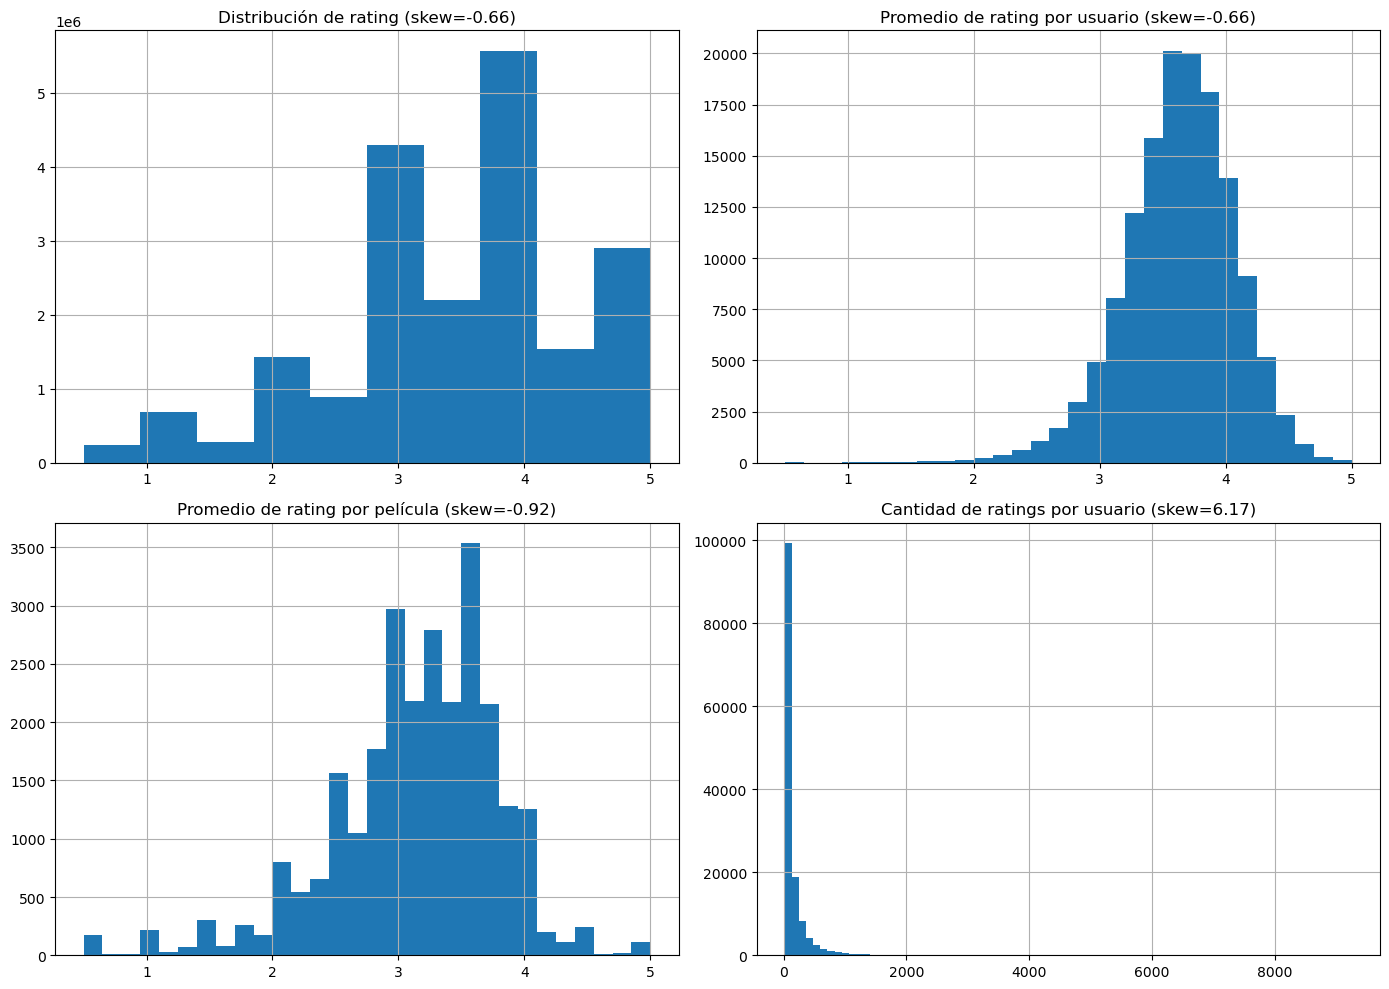

In [19]:
import matplotlib.pyplot as plt

df_ratings = dataframes.get('rating')

fig, axs = plt.subplots(nrows=2, ncols=2)

skew_rating = df_ratings['rating'].skew()
skew_user_avg = df_ratings.groupby('userId')['rating'].mean().skew()
skew_movie_avg = df_ratings.groupby('movieId')['rating'].mean().skew()
skew_user_count = df_ratings.groupby('userId')['rating'].count().skew()

# rating distribution
df_ratings['rating'].hist(ax=axs[0, 0], figsize=(14, 10), bins=10)
axs[0, 0].set_title(f'Distribución de rating (skew={skew_rating:.2f})')

# avg rating per user
df_ratings.groupby('userId')['rating'].mean().hist(ax=axs[0, 1], figsize=(14, 10), bins=30)
axs[0, 1].set_title(f'Promedio de rating por usuario (skew={skew_user_avg:.2f})')

# avg rating per movie
df_ratings.groupby('movieId')['rating'].mean().hist(ax=axs[1, 0], figsize=(14, 10), bins=30)
axs[1, 0].set_title(f'Promedio de rating por película (skew={skew_movie_avg:.2f})')

# count of ratings per user
df_ratings.groupby('userId')['rating'].count().hist(ax=axs[1, 1], figsize=(14, 10), bins=80)
axs[1, 1].set_title(f'Cantidad de ratings por usuario (skew={skew_user_count:.2f})')

plt.tight_layout()


In [21]:
num_ratings = df_ratings.groupby('userId')['rating'].count()

least_user = num_ratings.idxmin()
most_user = num_ratings.idxmax()

print(f'User with least ratings: {least_user} ({num_ratings[least_user]})')
print(f'User with most ratings: {most_user} ({num_ratings[most_user]})')

User with least ratings: 36 (20)
User with most ratings: 118205 (9254)


# generar dataset para modelos

pregunta -  debemos usar todos los datos?? son matrices muy grandes

In [24]:
from surprise import Reader, Dataset, KNNBasic, accuracy
from surprise.model_selection import train_test_split
import random
import numpy as np

seed = 10
random.seed(seed)
np.random.seed(seed)

In [27]:
reader = Reader( rating_scale = ( 1, 5 ) )
dataset = Dataset.load_from_df( df_ratings[ [ 'userId', 'movieId', 'rating' ] ], reader )

In [ ]:
train_set, test_set=  train_test_split(dataset, test_size=.2)

In [ ]:
train_set.n_ratings

In [ ]:
len(test_set)

In [ ]:
rating_data = dataset.build_full_trainset()
test=rating_data.build_anti_testset()